In [62]:
!pip install --upgrade google-api-python-client
!pip install protobuf
!pip install tensorflow==2.0.0-alpha0

Requirement already up-to-date: google-api-python-client in /home/tanmay/anaconda3/lib/python3.7/site-packages (1.7.9)


In [83]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

In [96]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_images = x_test

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


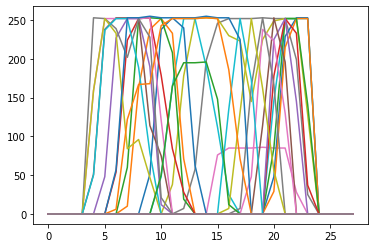

In [19]:
print(x_train)
plt.plot(x_train[1])
plt.show()

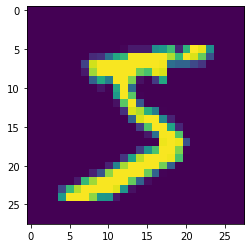

In [28]:
plt.imshow(x_train[0])

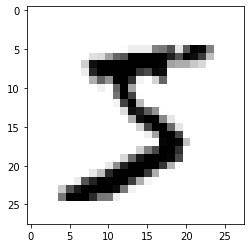

In [27]:
plt.imshow(x_train[0],cmap = plt.cm.binary)

In [63]:
x_train = tf.keras.utils.normalize(x_train, axis=1).reshape(x_train.shape[0], -1)
x_test = tf.keras.utils.normalize(x_test, axis=1).reshape(x_test.shape[0], -1)

In [64]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [66]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0535 - accuracy: 0.9825
Epoch 2/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0408 - accuracy: 0.9868
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0310 - accuracy: 0.9898
Epoch 4/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0251 - accuracy: 0.9914
Epoch 5/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0208 - accuracy: 0.9929
Epoch 6/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0170 - accuracy: 0.9943
Epoch 7/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0151 - accuracy: 0.9951
Epoch 8/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0145 - accuracy: 0.9948
Epoch 9/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0120 - accuracy: 0.9960
Epoch 10/10
60000/60000 [============

In [67]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         multiple                  0         
_________________________________________________________________
dense_40 (Dense)             multiple                  100480    
_________________________________________________________________
dense_41 (Dense)             multiple                  16512     
_________________________________________________________________
dense_42 (Dense)             multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [68]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss) 
print(val_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.1050 - accuracy: 0.9778
0.1050214209885635
0.9778


In [73]:
model.save('tensorflow_mnist_numbers.hdf5')

In [76]:
new_model = tf.keras.models.load_model('tensorflow_mnist_numbers.hdf5')

W0530 18:18:55.948474 139649844164416 hdf5_format.py:266] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


In [78]:
predict = new_model.predict(x_test)

In [79]:
print(predict)

[[4.5857320e-14 7.9205371e-13 5.6123071e-12 ... 1.0000000e+00
  2.1435681e-12 1.2411991e-11]
 [2.3742544e-18 1.9402687e-15 1.0000000e+00 ... 2.2180994e-21
  2.4171673e-20 4.2714491e-24]
 [3.4298282e-14 1.0000000e+00 4.3533822e-11 ... 1.2858951e-08
  1.2251545e-09 2.3417173e-13]
 ...
 [7.9638559e-14 4.6222555e-09 4.1499469e-15 ... 1.9366473e-07
  4.6850193e-12 3.6535561e-09]
 [4.2518293e-15 2.1507076e-14 5.4725904e-16 ... 8.5633682e-14
  2.8105109e-07 1.8594599e-20]
 [3.6070883e-13 3.7903073e-15 1.1971063e-18 ... 4.2041679e-24
  3.6983225e-17 1.6553384e-15]]


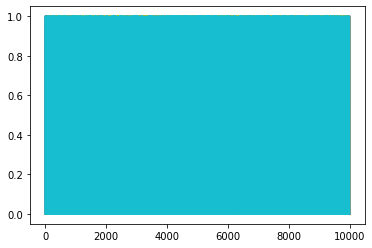

In [81]:
plt.plot(predict)

In [86]:
print(np.argmax(predict[0]))

[4.5857320e-14 7.9205371e-13 5.6123071e-12 7.2728112e-10 1.0517316e-15
 6.4833479e-13 2.8419598e-24 1.0000000e+00 2.1435681e-12 1.2411991e-11]


In [87]:
for i in predict:
    print(np.argmax(i))

7
2
1
0
4
1
4
9
5
9
0
6
9
0
1
5
9
7
8
4
9
6
6
5
4
0
7
4
0
1
3
1
3
4
7
2
7
1
2
1
1
7
4
2
3
5
1
2
4
4
6
3
5
5
6
0
4
1
9
5
7
8
9
3
7
4
6
4
3
0
7
0
2
9
1
7
3
2
9
7
7
6
2
7
8
4
7
3
6
1
3
6
9
3
1
4
1
7
6
9
6
0
5
4
9
9
2
1
9
4
8
7
3
9
7
9
4
4
9
2
5
4
7
6
7
9
0
5
8
5
6
6
5
7
8
1
0
1
6
4
6
7
3
1
7
1
8
2
0
9
9
9
5
5
1
5
6
0
3
4
4
6
5
4
6
5
4
5
1
4
4
7
2
3
2
7
1
8
1
8
1
8
5
0
8
9
2
5
0
1
1
1
0
9
0
3
1
6
4
2
3
6
1
1
1
3
9
5
2
9
4
5
9
3
9
0
3
6
5
5
7
2
2
7
1
2
8
4
1
7
3
3
8
8
7
9
2
2
4
1
5
9
8
7
2
3
0
2
4
2
4
1
9
5
7
7
2
8
2
6
8
5
7
7
9
1
8
1
8
0
3
0
1
9
9
4
1
8
2
1
2
9
7
5
9
2
6
4
1
5
8
2
9
2
0
4
0
0
2
8
4
7
1
2
4
0
2
7
4
3
3
0
0
3
1
9
6
5
2
5
9
7
9
3
0
4
2
0
7
1
1
2
1
5
3
3
9
7
8
6
3
6
1
3
8
1
0
5
1
3
1
5
5
6
1
8
5
1
7
9
4
6
2
2
5
0
6
5
6
3
7
2
0
8
8
5
4
1
1
4
0
3
3
7
6
1
6
2
1
9
2
8
6
1
9
5
2
5
4
4
2
8
3
8
2
4
5
0
3
1
7
7
5
7
9
7
1
9
2
1
4
2
9
2
0
2
9
1
4
8
1
8
4
5
9
8
8
3
7
6
0
0
3
0
2
0
6
7
9
5
3
3
2
3
9
1
2
6
8
0
9
6
6
6
3
8
8
2
7
5
8
9
6
1
8
4
1
2
5
9
1
9
7
5
4
0
8
9
9
1
0
5
2
3
7
0
9
4
0
6


7
6
4
5
7
6
6
9
9
6
3
6
2
9
8
1
2
2
5
5
2
3
7
2
1
0
1
0
4
5
2
8
2
8
3
5
1
7
7
1
1
2
9
7
8
4
0
3
0
7
8
8
4
7
7
8
5
8
4
9
8
1
3
8
0
3
1
7
4
5
6
1
6
5
7
4
9
3
5
4
7
1
2
0
8
1
6
0
7
3
4
7
3
9
6
0
8
6
4
8
7
7
9
3
8
6
9
7
2
3
4
0
2
1
0
3
5
5
7
2
4
0
7
2
8
3
0
8
7
8
4
0
8
4
4
5
8
5
6
6
3
0
9
3
7
6
8
9
3
9
9
5
8
9
1
2
8
8
6
8
1
3
7
9
0
1
1
4
7
0
8
1
7
4
5
7
1
2
1
1
3
9
6
2
1
2
6
8
7
6
6
9
3
7
0
5
2
8
0
5
4
3
8
4
6
6
2
7
9
5
1
3
2
4
3
6
1
9
4
4
7
6
5
4
1
9
9
2
7
8
0
1
3
6
1
3
4
1
1
1
5
6
0
7
0
7
2
3
2
5
2
2
9
4
9
8
1
2
1
6
1
2
7
4
0
0
0
8
2
2
9
2
2
4
9
9
2
7
5
1
3
4
9
4
1
3
5
6
2
8
3
1
2
8
4
9
9
3
7
0
7
7
2
3
2
4
0
3
9
9
8
4
1
0
6
0
9
6
8
6
1
1
9
8
9
2
3
5
5
9
4
2
1
9
4
3
9
6
0
4
0
6
0
1
2
3
4
7
8
9
0
1
2
3
4
7
8
9
0
1
2
3
4
5
6
7
8
9
8
3
4
7
8
6
3
4
0
9
7
1
9
3
8
4
7
3
0
9
1
4
5
4
6
2
0
6
2
1
1
1
1
7
2
4
7
5
2
9
4
5
8
4
2
9
7
0
0
7
5
1
1
7
6
6
6
8
2
2
7
7
4
0
2
4
2
1
8
9
6
1
0
5
9
6
9
8
0
4
0
8
3
9
6
3
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
5
4
8
7
4
7
7
3
9
8
8
3
1
5
8
2
7
4
2


8
8
7
2
2
3
9
3
3
5
5
0
7
4
5
6
5
1
4
1
1
2
8
2
6
1
5
0
1
2
3
4
5
0
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
8
0
6
0
8
2
3
7
9
4
7
1
9
1
7
1
4
0
0
1
7
5
7
1
3
3
3
1
6
9
7
1
3
0
7
6
0
8
9
7
3
5
4
8
1
5
9
0
6
6
3
8
1
4
7
5
2
0
0
1
7
8
9
6
8
8
2
3
6
1
8
9
5
2
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
6
6
7
8
9
7
4
6
1
4
0
4
9
8
7
8
0
7
5
8
5
3
2
2
0
5
8
6
0
3
8
1
0
3
0
4
7
4
9
0
9
0
7
1
7
1
6
6
0
6
2
8
7
5
4
9
9
5
3
7
4
3
0
1
5
6
1
1
3
2
1
0
0
1
2
3
4
7
8
4
0
1
2
3
4
5
6
7
8
0
1
2
3
4
7
8
9
0
8
3
9
5
5
2
6
8
4
1
7
1
3
3
5
6
9
1
1
1
2
1
2
0
7
7
5
8
2
9
8
6
7
3
4
6
8
7
0
4
2
7
7
5
4
3
4
2
8
1
5
1
0
2
3
3
5
7
0
6
8
6
3
9
9
5
2
7
7
1
0
1
7
8
9
0
1
8
3
4
5
6
7
8
0
1
2
3
4
7
8
9
7
8
6
4
1
9
3
8
4
4
7
0
1
9
2
8
7
8
2
6
0
6
5
3
3
3
9
1
4
0
6
1
0
0
6
2
1
1
7
7
8
4
6
0
7
0
3
6
8
7
1
5
2
4
9
4
3
6
4
1
7
2
6
5
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6


7


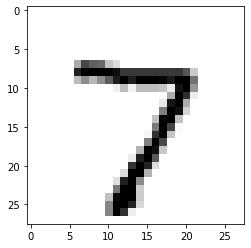

In [104]:
print(np.argmax(predict[0]))
plt.imshow(x_images[0],cmap = plt.cm.binary)